In [5]:
import gdspy
import qnldraw as qd
import qnldraw.library as qlib
from qnldraw import Chip, shapes, components
import qnldraw.paths as paths
import numpy as np

In [40]:
class JunctionArray(components.Component):
    __draw__ = True
    
    def draw(self, n, overlap, wire, undercut):
        jx, jy = overlap
        wx, wy = wire
        
        spacing = jy + wy
        
        positions = (np.arange(n) - (n-1)/2)*spacing
        
        for y in positions:
            junction_rect = shapes.Rectangle(jx, jy).translate(0, y)
            undercuts = [
                shapes.Rectangle(undercut, jy, 'right', layer=1).translate(-jx/2, y),
                shapes.Rectangle(undercut, jy, 'left', layer=1).translate(jx/2, y)
            ]
            
            self.add(junction_rect)
            self.add(undercuts)
            
        for i, y in enumerate(positions[:-1]):
            wire_rect = shapes.Rectangle(wx, wy, 'bottom').translate(0, y + 0.5*jy)
            undercuts = shapes.Rectangle(
                undercut, wy, 'bottom left' if i%2 else 'bottom right', layer=1
            ).translate(
                (2*(i%2) - 1)*wx/2, y + 0.5*jy
            )

            self.add(wire_rect)
            self.add(undercuts)
            
        nodes = {
            'wire1': np.array((0, positions[-1] + 0.5*jy)),
            'wire2': np.array((0, positions[0] - 0.5*jy))
        }
        return nodes

class AntennaSymmetric(components.Component):
    __draw__ = True
    
    def draw(self, pad, lead, gap):
        pad_x, pad_y = pad
        lead_x, lead_y = lead
        
        antenna = [
            shapes.Rectangle(pad_x, pad_y). translate((gap/2+lead_x+pad_x/2),0),
            shapes.Rectangle(pad_x, pad_y). translate(-(gap/2+lead_x+pad_x/2),0),
            shapes.Rectangle(lead_x, lead_y). translate(gap/2+lead_x/2,0),
            shapes.Rectangle(lead_x, lead_y). translate(-gap/2-lead_x/2,0)
        ]
        self.add(antenna)
        nodes = {
            'left': (gap/2,0)
        }
        return nodes

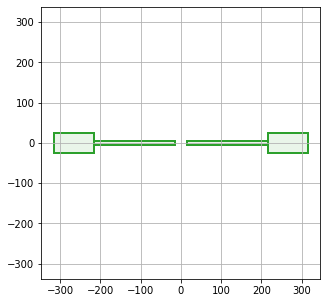

In [50]:
if __name__ == "__main__":
    lib = gdspy.GdsLibrary()
    chip = qd.Chip(size = (7000,4000))
    
    pad = (100,50)
    lead = (200, 10)
    gap = 30
    
    antenna = AntennaSymmetric(pad, lead, gap)
    
    chip.add_component(antenna, cid = 'antenna', layers = 2)
    mask = chip.render(name = 'fluxonium', draw_border = True)
    fig = qd.plot(antenna)
#     fig = qd.plot(mask[0], figsize=(20,20), axis=True, grid=False)